In [1]:
import sys
import os
import json

if 'google.colab' in sys.modules:
  print("You are in colab")
  from google.colab import drive
  drive.mount('/content/drive')
  os.chdir('/content/drive/MyDrive/Otros/arms-robotic-system/jupyter_notebooks')
  !pip install pyngrok drake
  from pyngrok import ngrok

from pydrake.geometry import ( StartMeshcat )
from pydrake.geometry.optimization import (SaveIrisRegionsYamlFile,LoadIrisRegionsYamlFile) # type: ignore

# add parent folders to path
sys.path.append(os.path.abspath('..'))

# Update the import
from src.auxiliar_functions import (VisualizeConnectivity)
from src.gcs_trajectory_optimization import GcsTrajOpt, demo_trajectory_optimization
from src.iris_options import load_config, create_iris_options
from src.joint_teleop import JointTeleop
from src.gcs_helper import VisualizeRegions
from src.end_effector_teleop import EndEffectorTeleop

# Start the visualizer (only run this once).
meshcat = StartMeshcat()
if 'google.colab' in sys.modules:
  # Create a tunnel to the Meshcat server
  ngrok.set_auth_token("2rdws4UBYTqZ1NiiyEbJcWRnByV_7D9Jg8K3YVyZzbFMN1ysg")
  public_url = ngrok.connect(7000, "http")
  print(f"Meshcat is accessible at: {public_url}")

INFO:drake:Meshcat listening for connections at http://localhost:7000


In [2]:
parent_dir = os.path.abspath('..')
iris_regions = dict()

with open(os.path.join(parent_dir, 'common-files','gcs_seeds.json'), 'r') as f:
    iris_seeds = json.load(f)


if os.path.isfile(os.path.join(parent_dir, 'options.yaml')):
    config = load_config(os.path.join(parent_dir, 'options.yaml'))
    iris_filename = os.path.join(parent_dir,config["iris_regions_path"])
    if os.path.isfile(iris_filename):
        iris_regions.update(LoadIrisRegionsYamlFile(iris_filename))
        print(f"Loaded iris regions from {iris_filename}.")
    else:
        print(f"{iris_filename} not found. No previously computed regions were loaded.")

Loaded iris regions from /home/arath/github/arms-robotic-system/common-files/regions/my_regions.yaml.


In [3]:
with open(os.path.join(parent_dir, 'common-files','gcs_seeds.json'), 'r') as f:
    iris_seeds = json.load(f)
    iris_seeds = {key: iris_seeds[key] for key in iris_regions if key in iris_seeds}

In [4]:
len(iris_seeds)

12

In [5]:
demo_trajectory_optimization(iris_regions, iris_seeds,meshcat)

INFO:drake:Solved GCS shortest path using Clp with convex_relaxation=true and preprocessing=true and rounding.
INFO:drake:Found 1 unique paths, discarded 99 duplicate paths.
INFO:drake:Finished 1 rounding solutions with Clp.


GCS solved in 0.3677504062652588 seconds
time:  0.0 3e-06
running animation


INFO:drake:Solved GCS shortest path using Clp with convex_relaxation=true and preprocessing=true and rounding.
INFO:drake:Found 5 unique paths, discarded 4 duplicate paths.
INFO:drake:Finished 5 rounding solutions with Clp.


GCS solved in 0.8936498165130615 seconds
time:  0.0 6.924833347949476
running animation


INFO:drake:Solved GCS shortest path using Clp with convex_relaxation=true and preprocessing=true and rounding.
INFO:drake:Found 5 unique paths, discarded 3 duplicate paths.
INFO:drake:Finished 5 rounding solutions with Clp.


GCS solved in 0.5480751991271973 seconds
time:  0.0 6.924833347693316
running animation


INFO:drake:Solved GCS shortest path using Clp with convex_relaxation=true and preprocessing=true and rounding.
INFO:drake:Found 5 unique paths, discarded 12 duplicate paths.
INFO:drake:Finished 5 rounding solutions with Clp.


GCS solved in 0.5269696712493896 seconds
time:  0.0 4.584937794156015
running animation


INFO:drake:Solved GCS shortest path using Clp with convex_relaxation=true and preprocessing=true and rounding.
INFO:drake:Found 5 unique paths, discarded 90 duplicate paths.
INFO:drake:Finished 5 rounding solutions with Clp.


GCS solved in 0.8933010101318359 seconds
time:  0.0 4.749932203495205
running animation


INFO:drake:Solved GCS shortest path using Clp with convex_relaxation=true and preprocessing=true and rounding.
INFO:drake:Found 5 unique paths, discarded 5 duplicate paths.
INFO:drake:Finished 5 rounding solutions with Clp.


GCS solved in 0.41600656509399414 seconds
time:  0.0 4.86686025080308
running animation


INFO:drake:Solved GCS shortest path using Clp with convex_relaxation=true and preprocessing=true and rounding.
INFO:drake:Found 5 unique paths, discarded 4 duplicate paths.
INFO:drake:Finished 5 rounding solutions with Clp.


GCS solved in -1.8037018775939941 seconds
time:  0.0 4.8668602506825005
running animation


INFO:drake:Solved GCS shortest path using Clp with convex_relaxation=true and preprocessing=true and rounding.
INFO:drake:Found 5 unique paths, discarded 11 duplicate paths.
INFO:drake:Finished 5 rounding solutions with Clp.


GCS solved in 0.8330988883972168 seconds
time:  0.0 6.485716285428572
running animation


INFO:drake:Solved GCS shortest path using Clp with convex_relaxation=true and preprocessing=true and rounding.
INFO:drake:Found 1 unique paths, discarded 99 duplicate paths.
INFO:drake:Finished 1 rounding solutions with Clp.


GCS solved in 0.5616495609283447 seconds
time:  0.0 6.485716285714285
running animation


INFO:drake:Solved GCS shortest path using Clp with convex_relaxation=true and preprocessing=true and rounding.
INFO:drake:Found 5 unique paths, discarded 10 duplicate paths.
INFO:drake:Finished 5 rounding solutions with Clp.


GCS solved in -1.8212494850158691 seconds
time:  0.0 12.882204450486407
running animation


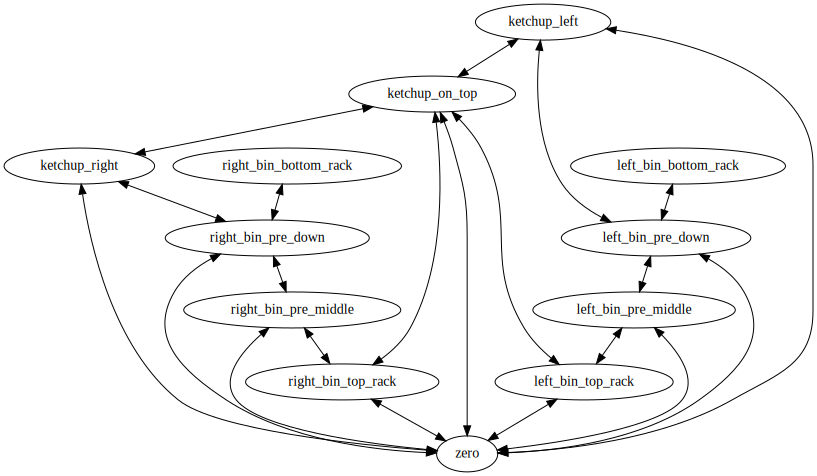

In [6]:
VisualizeConnectivity(iris_regions)